<a href="https://colab.research.google.com/github/skdding3/AI_Bootcamp_Project/blob/main/Section_2_Project_Sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 2 Project - Prediction Pokemon Battle 

1) 데이터 선정 이유 및 문제 정의
가장 좋아하는 분야이지 직업적인 목표로 방향성을 잡은 도메인 게임 데이터를 선택했습니다. 그 중 어렸을때 추억을 가진 게임이자 포켓몬을 능력치(stats)을 통한 간단한 머신러닝 분석을 통해 승부 Prediction 모델을 구축해보는 것 으로 시작해보고자 합니다. 
Data discription



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Project 2/Pokemon.csv')

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


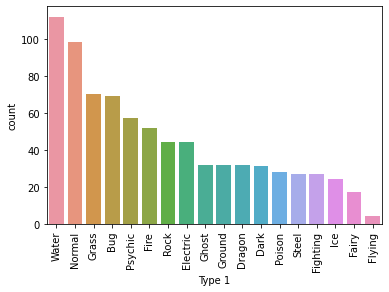

In [ ]:
sns.countplot(x='Type 1', data=df, order=df['Type 1'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

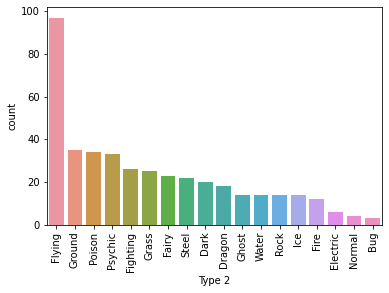

In [ ]:
sns.countplot(x = 'Type 2', data = df, order = df['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()